# Dashboards

In [1]:
from pathlib import Path
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt
import json
import pygeos as pyg
import sys
from shapely import wkt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba_array
from matplotlib.lines import Line2D

sys.path.append("../scripts")
from utils import *
from Europe_utils import *

config = load_config(file='config-KeesWork.json')
config

{'comment': 'This json file contains the paths to the directories where the in- and output files are located',
 'paths': {'data': WindowsPath('D:/Python/europe_flood_road_disruption/data'),
  'output_data': WindowsPath('D:/Python/europe_flood_road_disruption/data/output'),
  'output_images': WindowsPath('D:/Python/europe_flood_road_disruption/visualisations'),
  'NUTS_shapes': WindowsPath('D:/Europe_trade_disruptions/NUTS-2_shapes/NUTS_2016'),
  'graphs_folder': WindowsPath('D:/Europe_percolation/frederiques_networks'),
  'preproc_output': WindowsPath('D:/Europe_percolation/combined_results/combined_preproc_output'),
  'main_output': WindowsPath('D:/Europe_percolation/combined_results/combined_main_output')}}

In [4]:
from visualisations_new import aggregate_results_step1, aggregate_results_step2, percolation_summary

In [5]:
from visualisations_new import main
df,df_abs,df_rel = main(config)

perc_overview = percolation_summary(df)
perc_overview
#perc_overview.to_csv('Completeness_14-5-2021.csv',sep=';')

 -------- main() starting --------
Succesfully loaded source file as dataframe, with columns:
Index(['AoI combinations', 'disrupted', 'avg extra time', 'AoI removed',
       'no detour', 'country'],
      dtype='object')
Available for 30 countries
Grouping per AoI-country combination
 -------- main() finished --------


,AoIs,Reps_unique,Mode_reps,Frequency_mode_reps
Albania,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[176, 200, 1]",200,14
Austria,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[200, 1]",200,18
Belgium,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[183, 500, 1]",500,14
Bulgaria,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[200, 1]",200,19
Croatia,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[200, 1]",200,17
Czechia,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[200, 1]",200,18
Estonia,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[139, 200, 1]",200,14
Finland,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[200, 1]",200,29
Germany,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[1235, 293, 307, 287, 290, 305, 309, 312, 295,...",305,4
Greece,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50...","[200, 1]",200,18


In [6]:
df_rel.loc[df_rel['country']=='Denmark']

,AoI relative combinations,country,min,q_05,q_25,mean,q_75,q_95,max
183,1.333333,Denmark,0.000000,0.000000,0.000000,1.392593,0.000000,4.222222,53.333333
268,2.666667,Denmark,0.000000,0.000000,0.000000,2.893333,0.000000,20.000000,55.555556
305,4.000000,Denmark,0.000000,0.000000,0.000000,4.800000,0.000000,26.777778,62.222222
331,5.333333,Denmark,0.000000,0.000000,0.000000,5.493333,2.222222,53.333333,62.222222
354,6.666667,Denmark,0.000000,0.000000,0.000000,6.680000,2.222222,53.333333,64.444444
367,8.000000,Denmark,0.000000,0.000000,0.000000,7.564444,8.888889,53.333333,64.444444
377,9.333333,Denmark,0.000000,0.000000,0.000000,8.831111,8.888889,53.333333,66.666667
386,10.666667,Denmark,0.000000,0.000000,0.000000,9.862222,17.777778,53.333333,66.666667
397,12.000000,Denmark,0.000000,0.000000,0.000000,11.653333,17.777778,55.555556,68.888889
405,13.333333,Denmark,0.000000,0.000000,0.000000,13.995556,20.000000,55.555556,64.444444


### Load required input data

In [8]:
def NUTS_up(N3):
    """Return the corresponding NUTS-2 code for a NUTS-3 code. 
    """
    return N3[:-1]

#LOAD NUTS DATA
N3_path = config['paths']['NUTS_shapes'] / 'NUTS_RG_01M_2016_3035_LEVL_3.shp'
N3 = gpd.read_file(N3_path)
N3 = N3.loc[~N3["NUTS_ID"].isin(NUTS_3_remote())] #Remote overseas territories
N3 = N3.loc[~(N3["CNTR_CODE"] == "TR")] #Remove Turkey
#N3 = N3.to_crs("epsg:4326")

N2_path = config['paths']['NUTS_shapes'] / 'NUTS_RG_01M_2016_3035_LEVL_2.shp'
N2 = gpd.read_file(N2_path)
N2 = N2.loc[~(N2["CNTR_CODE"] == "TR")] #Remove Turkey
NUTS_2_remote = list(set([NUTS_up(N3) for N3 in NUTS_3_remote()]))
N2 = N2.loc[~N2['NUTS_ID'].isin(NUTS_2_remote)]
#N2.plot()

graphs_folder = config['paths']['graphs_folder']

In [9]:
#Load centroids of NUTS-2 and NUTS-3 regions (made in the preprocessing scripts)
centroids_n2 = config['paths']['data'] / 'europe_nuts2_centroids.feather'
centroids_n3 = config['paths']['data'] / 'europe_nuts3_centroids.feather'
assert (centroids_n2.exists() and centroids_n3.exists())

#Process and filter NUTS-3 regions
centroids_n3 =pd.read_feather(centroids_n3)
centroids_n3['geometry'] = centroids_n3['geometry'].apply(wkt.loads)
centroids_n3 = gpd.GeoDataFrame(centroids_n3)
centroids_n3.crs = 'epsg:4326'
centroids_n3 = centroids_n3.to_crs('epsg:3035')
centroids_n3 = centroids_n3.loc[~centroids_n3["NUTS_ID"].isin(NUTS_3_remote())]
centroids_n3 = centroids_n3.loc[~(centroids_n3["CNTR_CODE"] == "TR")]
#centroids_n3.plot()

#Process and filter NUTS-2 regions
centroids_n2 =pd.read_feather(centroids_n2)
centroids_n2['geometry'] = centroids_n2['geometry'].apply(wkt.loads)
centroids_n2 = gpd.GeoDataFrame(centroids_n2)
centroids_n2.crs = 'epsg:4326'
centroids_n2 = centroids_n2.to_crs('epsg:3035')
centroids_n2 = centroids_n2.loc[~centroids_n2["NUTS_ID"].isin(NUTS_2_remote)]
centroids_n2 = centroids_n2.loc[~(centroids_n2["CNTR_CODE"] == "TR")]
#centroids_n2.plot()    

### Load and process raw percolation results

In [10]:
import visualisations_new as vis
#LOAD RESULTS OF THE PERCOLATION: DISRUPTED ROUTES
df,df_abs,df_rel = vis.main(config)
df.head(n=2)

#LOAD AND PROCESS NO DETOUR RESULTS
no_dt_abs, no_dt_rel = vis.process_no_detour(df)

#LOAD AND PROCESS EXTRA TIME VISUALISATIONS
extra_time_abs,extra_time_rel = vis.process_extra_time(df)

#LOAD AND PROCESS TOTAL EXTRA TRAVEL TIME RESULTS
#THIS IS DONE PER INDIVIDUAL COUNTRY TO SPEED-UP THE SCRIPT

 -------- main() starting --------
Succesfully loaded source file as dataframe, with columns:
Index(['AoI combinations', 'disrupted', 'avg extra time', 'AoI removed',
       'no detour', 'country'],
      dtype='object')
Available for 30 countries
Grouping per AoI-country combination
 -------- main() finished --------
 -------- Process_no_detour() finished --------
 -------- Process_extra_time() finished --------


In [11]:
all_countries = df['country'].unique()
all_countries

array(['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czechia',
       'Estonia', 'Finland', 'Germany', 'Greece', 'Hungary', 'Ireland',
       'Lithuania', 'Macedonia', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'United kingdom', 'Denmark', 'Italy',
       'Latvia', 'France'], dtype=object)

### Load the group lists

In [12]:
groups_file = config['paths']['data'] / 'groups' / '6groupsof6_byactivesize.json'
assert groups_file.exists()
with open(groups_file,'rb') as f:
     groups = json.load(f)
print(groups['info'])
groups = groups['groups']
print(groups)

6 groups of 5 countries; sorted by country area size, only including -active- area (NUTS-3 which centroid is connected to main graph)
{'0': ['SI', 'MK', 'AL', 'BE', 'NL'], '1': ['CH', 'DK', 'EE', 'SK', 'HR'], '2': ['LV', 'LT', 'IE', 'RS', 'CZ'], '3': ['AT', 'PT', 'HU', 'BG', 'EL'], '4': ['UK', 'RO', 'IT', 'PL', 'NO'], '5': ['FI', 'DE', 'SE', 'ES', 'FR']}


In [13]:
### Load some very specific utils for this script, to reduce the lenght of this ipynb
from dashboard_utils import *

In [14]:
config = load_config(file='config-KeesWork.json')
config

{'comment': 'This json file contains the paths to the directories where the in- and output files are located',
 'paths': {'data': WindowsPath('D:/Python/europe_flood_road_disruption/data'),
  'output_data': WindowsPath('D:/Python/europe_flood_road_disruption/data/output'),
  'output_images': WindowsPath('D:/Python/europe_flood_road_disruption/visualisations'),
  'NUTS_shapes': WindowsPath('D:/Europe_trade_disruptions/NUTS-2_shapes/NUTS_2016'),
  'graphs_folder': WindowsPath('D:/Europe_percolation/frederiques_networks'),
  'preproc_output': WindowsPath('D:/Europe_percolation/combined_results/combined_preproc_output'),
  'main_output': WindowsPath('D:/Europe_percolation/combined_results/combined_main_output')}}

In [15]:
#list of countries in the right order
#Figure number is index + 1
country_order = []
for cs in groups: 
    country_order.extend(groups[cs])
#country_order

### Color settings for plot

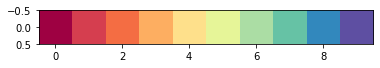

In [16]:
colors = ['#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2']
roads_cc = colors[0:5][::-1] #We iterate over the roads in reversed order
roads_lw_cc = [1,0.7,0.5,.3,.3][::-1] #linewidth cycler
nuts_fill = '#abdda4'
nuts_border = '#66c2a5'

length_cols = ['Total_Edge_Length', 'Len_Motorway', 'Len_Trunk', 'Len_Primary', 'Len_Secondary', 'Len_Tertiary']

road_types = ['motorway','trunk','primary','secondary','tertiary']

plt.imshow(to_rgba_array(colors).reshape(1,len(colors),4))
plt.show()

newgrey = '#969696'

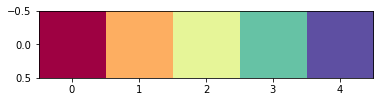

In [17]:
#5 contrasting colors
c = [j for j in colors]
color_5 = [c[0],c[3],c[5],c[7],c[9]]
plt.imshow(to_rgba_array(color_5).reshape(1,len(color_5),4))
plt.show()

In [18]:
import matplotlib as mpl

font = {'family' : 'arial'}
mpl.rc('font', **font)  # pass in the font dict as kwargs
grey = '#444444'
mpl.rcParams.update({'text.color' : grey,
                     'axes.labelcolor' : grey,
                     'axes.titlecolor' : grey,
                     'axes.edgecolor' : grey,
                     'xtick.color': grey, #This is the color of the categories on y- and x-axis
                     'ytick.color': grey                    })

### Creating one dashboard

In [19]:
n2_analysis = ['BE','NL','DE','UK','IT'] #List of countries for which analysis is done on NUTS-2 level instead of NUTS-3 level

In [35]:
#c = 'AL'
#save_pdf=False,
#save_png=True
#fb=('q_05','q_95')

def create_dashboard(c,save_pdf=False,save_png=False,fb=('q_05','q_95')):
    """
    Create dashboard for a country
    
    Arguments:
        *c* (string) : NUTS0-code of country, e.g. 'AT'
        *save_pdf* (Boolean) : indicate if fig should be saved in dashboards/... as pdf file
        *save_png* (Boolean) : indicate if fig should be saved in dashboards/... as png file
        *fb* (tuple) : fill_between setting for the aggregated lineplots, e.g. ('q_05','q_95')
    
    """
    fig = plt.figure(figsize=(1.5*16,1.5*9))


    nrows=3
    ncols=3
    hr = [3,1,1]

    grid = plt.GridSpec(nrows=nrows,ncols=ncols, wspace = .2, hspace = .2, figure=fig, height_ratios=hr)

    ax00 = fig.add_subplot(grid[0, 1:3])
    ax03 = fig.add_subplot(grid[0, 0])
    ax10 = fig.add_subplot(grid[1, 0])
    ax11 = fig.add_subplot(grid[1, 1])
    ax12 = fig.add_subplot(grid[1, 2])
    ax20 = fig.add_subplot(grid[2, 0])
    ax21 = fig.add_subplot(grid[2, 1])
    ax22 = fig.add_subplot(grid[2, 2])
    
    #### Prepare empty legend handles ####
    handles00 = []
    
    

    
    ######################################## TOP PANEL (MAP top right): ax00 ###############################################
    
    nutslevel = 'n3' #n3 or n2
    if c in n2_analysis: nutslevel = 'n2'
    
    if nutslevel == 'n3':
        print('Making NUTS-3 plot')
        #PLOT AREA
        N3_sel = N3.loc[(N3["CNTR_CODE"] == c)]
        N3_sel_active = N3_sel[~N3_sel['NUTS_ID'].isin(NUTS_3_islands())]
        N3_sel_active.plot(ax=ax00,facecolor=nuts_fill,alpha=0.3,edgecolor=nuts_border)
        N3_sel_inactive = N3_sel[N3_sel['NUTS_ID'].isin(NUTS_3_islands())]
        N3_sel_inactive.plot(ax=ax00,facecolor='grey',alpha=0.3,edgecolor='grey')
        
        #Plot centroids
        centroids_n3_sel = centroids_n3[~centroids_n3['NUTS_ID'].isin(NUTS_3_islands())]
        centroids_n3_sel.loc[centroids_n3_sel['CNTR_CODE'] == c].plot(ax=ax00,color='black',markersize=10,zorder=5)
        
        handles00.append(Line2D([0], [0], color=nuts_border, label='NUTS-3 regions',linestyle='-',alpha=0.3))   
        handles00.append(Line2D([0], [0], marker='o', color='w', label='NUTS-3 centroid', markerfacecolor='black', markersize=5))
        
    elif nutslevel == 'n2':
        print('Making NUTS-2 plot')
        #PLOT AREA
        N2_sel = N2.loc[(N2["CNTR_CODE"] == c)]
        NUTS_2_islands = list(set([NUTS_up(N3) for N3 in NUTS_3_islands()]))
        if c == 'UK': NUTS_2_islands.remove('UKM6') #workaround for the UK
        N2_sel_active = N2_sel[~N2_sel['NUTS_ID'].isin(NUTS_2_islands)]
        N2_sel_active.plot(ax=ax00,facecolor=nuts_fill,alpha=0.3,edgecolor=nuts_border)
        N2_sel_inactive = N2_sel[N2_sel['NUTS_ID'].isin(NUTS_2_islands)]
        N2_sel_inactive.plot(ax=ax00,facecolor='grey',alpha=0.3,edgecolor='grey')
        
        #Plot centroids
        #Todo: gives an error
        centroids_n2_sel = centroids_n2[~centroids_n2['NUTS_ID'].isin(NUTS_2_islands)]
        centroids_n2_sel.loc[centroids_n2_sel['CNTR_CODE'] == c].plot(ax=ax00,color='black',markersize=10,zorder=5)
        
        handles00.append(Line2D([0], [0], color=nuts_border, label='NUTS-2 regions',linestyle='-',alpha=0.3))
        handles00.append(Line2D([0], [0], marker='o', color='w', label='NUTS-2 centroid', markerfacecolor='black', markersize=5))
    
    if True:
        #PLOT NETWORK
        L3 = N0_to_3L(c)
        edges_file = graphs_folder / '{}-edges.feather'.format(L3)
        #assert c,edges_file.exists()
        network = pd.read_feather(edges_file)
        network['geoms'] = pyg.io.to_wkt(
            pyg.from_wkb(network.geometry))  # see if this should be activated with the new feather files
        network['geoms'] = network['geoms'].apply(wkt.loads)
        network.drop('geometry', axis=1, inplace=True)
        network.rename(columns={'geoms': 'geometry'}, inplace=True)
        network['highway_mapped'] = network['highway'].map(highway_mapper())
        
        if True:
            handles00.append(Line2D([0], [0], label='OSM road types',alpha=0))
            for r,road_type in enumerate(road_types[::-1]):
                ns = network.loc[network['highway_mapped'] == road_type]
                ns = gpd.GeoDataFrame(ns)
                ns.plot(color=roads_cc[r],ax=ax00,linewidth=roads_lw_cc[r])
                handles00.append(Line2D([0], [0], color=roads_cc[r], label='  ' + road_type,linestyle='-',linewidth=roads_lw_cc[r]))
    
    #ADD SHADING ON TOP OF THE ROUTES THAT ARE USED IN PREFERRED ROUTES BETWEEN OD-PAIRS
    #Todo: move to more appropriate location
    #optimal_routes = config['paths']['preproc_output']  / 'optimal_routes_time_{}.feather'.format(country_names(c).lower())
    country_name = country_names(c).lower() 
    optimal_routes = config['paths']['preproc_output']  / '{}/optimal_routes_time_{}.feather'.format(country_name,country_name)
    #assert optimal_routes.exists()
    optimal_routes =pd.read_feather(optimal_routes)
    
    counter, to_plot = edge_count_optimal_routes(optimal_routes)
    for key in to_plot.keys():
        #key = 10 #plot edges used by n routes
        if max(to_plot.keys()) > 100: #smaller lines in case of many routes
            lw = 0.5 + 0.05 *key
        else: 
            lw = 0.5 + 0.2 *key
        sn = network.loc[network['id'].isin(to_plot[key])]
        sn = gpd.GeoDataFrame(sn)
        sn.plot(ax=ax00,color='yellow',linewidth=lw,alpha=0.5)
    handles00.append(Line2D([0], [0], color='yellow', label='Preferred routes',linestyle='-', lw=3,alpha=.7)) 
    
   
    ######################################## DATA PANEL top left (was right, therefore names ax03) ###############################################
    #GET THE INFO FOR THE TEXT PANEL
    ### Load dashboard statistics
    graph_stats_folder = config['paths']['data'] / 'graph_stats' / 'version2'
    with open(graph_stats_folder / (c+'.json')) as f:
        c_stats = json.load(f)

    #WRITE SOME TEXT 
    fignumber = country_order.index(c) + 1
    header = 'Figure SI {}: {} ({}/{})'.format(fignumber,country_names(c),c,N0_to_3L(c))
    ax03.text(x=0,y=1,s=header,fontweight='bold',transform=ax03.transAxes,ha='left',va='top',fontsize='large')

    if nutslevel == 'n3': 
        nr_nuts = centroids_n3_sel.loc[centroids_n3_sel['CNTR_CODE'] == c].shape[0]
        nuts_label = '# NUTS-3 regions: '
    elif nutslevel == 'n2' : 
        nr_nuts = centroids_n2_sel.loc[centroids_n2_sel['CNTR_CODE'] == c].shape[0]
        nuts_label = '# NUTS-2 regions: '
    
    s = ""
    s+= 'studied country area: {} km2 \n'.format(c_stats['active_country_area_km2'])
    s+= nuts_label + str(nr_nuts) + '\n'
    s+= '# edges: {} \n'.format(c_stats['Edge_No'])
    s+= '# nodes: {} \n'.format(c_stats['Node_No'])
    s+= '\n'
    s+= 'total network length: {} km \n'.format(c_stats['Len_tot__km'])
    s+= ' - motorways: {} km {} % \n'.format(c_stats['Len_Motorway'],int(round((100*c_stats['Len_Motorway']/c_stats['Len_tot__km']),0)))
    s+= ' - trunk roads: {} km {} % \n'.format(c_stats['Len_Trunk'],int(round((100*c_stats['Len_Trunk']/c_stats['Len_tot__km']),0)))
    s+= ' - primary roads: {} km {} % \n'.format(c_stats['Len_Primary'],int(round((100*c_stats['Len_Primary']/c_stats['Len_tot__km']),0)))
    s+= ' - secondary roads: {} km {} % \n'.format(c_stats['Len_Secondary'],int(round((100*c_stats['Len_Secondary']/c_stats['Len_tot__km']),0)))
    s+= ' - tertiary roads: {} km {} % \n'.format(c_stats['Len_Tertiary'],int(round((100*c_stats['Len_Tertiary']/c_stats['Len_tot__km']),0)))
    
    ax03.text(x=0,y=0.9,s=s,transform=ax03.transAxes,ha='left',va='top')
        
    

    ##### WRITE THE RESULTS OF THE PERCOLATION ANALYSIS ####
    #WRITE PERCOLATION RESULTS
    c_name = country_names(c)
    if c_name == 'United Kingdom': c_name = 'United kingdom'

    #Find group that c is in
    group_nr_sel = None
    for group_nr, members in groups.items():
        if c in members:
            group_nr_sel = group_nr
    
    #Set colors for aggregated lineplots
    group_members = groups[group_nr_sel]
    group_members_fullnames = [country_names(x) for x in group_members]
    
    index_in_list =  group_members.index(c)
    plot_colors = colors[5::]
    plot_colors[index_in_list] = colors[1] #Make country of this dashboard red
    
    #### BOXPLOTS
    flierprops = dict(marker='o', markerfacecolor='none', markersize=5, markeredgecolor=newgrey)
    
    fig, ax10 = vis.boxplot_one_country(df,c_name,fig=fig,ax=ax10,color=newgrey,flierprops=flierprops)
    fig, ax20 = vis.aggregated_lineplot_new(df_abs,group_members_fullnames,fig=fig,ax=ax20,fill_between=fb,clrs=plot_colors)
    ax10.set_title('Disruption of preferred routes (metric 1)')

    
    fig, ax11 = vis.no_detour_boxplot(df,c_name,save=False,fig=fig,ax=ax11,color=newgrey,flierprops=flierprops)
    fig, ax21 = vis.no_detour_aggregated_lineplot(no_dt_abs,group_members_fullnames,fig=fig,ax=ax21,fill_between=fb,clrs=plot_colors)
    ax11.set_title('Routes without detour (metric 2)')

    #Extra time boxplots
    df_totaltraveltime = vis.calc_total_extra_time(df,countries=group_members_fullnames,N2=n2_analysis)
    total_extra_time_abs, total_extra_time_rel = vis.process_total_extra_time(df_totaltraveltime)
    fig, ax12 = vis.extra_time_boxplot(df,c_name,unit='sec',save=False,fig=fig, ax=ax12,color=newgrey,flierprops=flierprops)
    fig, ax22 = vis.total_extra_time_aggregated_lineplot(total_extra_time_abs, group_members_fullnames, fill_between=fb, fig=fig,ax=ax22,clrs=plot_colors)

        
    ax12.set_title('Extra travel time (metric 3)')
    
    for ax in [ax10,ax11,ax12,ax20,ax21,ax22]:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        # Only show ticks on the left and bottom spines
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        
    ax10.set_xlabel('Number of microfloods per event (k)')
    ax10.set_ylabel('Preferred routes disrupted (%)')
    ax20.set_xlabel('Number of microfloods per event (k)')
    ax20.set_ylabel('Preferred routes disrupted (%)')
    
    ax11.set_xlabel('Number of microfloods per event (k)')
    ax11.set_ylabel('Routes without detour/isolated trips (%)')
    ax21.set_xlabel('Number of microfloods per event (k)')
    ax11.set_ylabel('Routes without detour/isolated trips (%)')
    
    ax12.set_xlabel('Number of microfloods per event (k)')
    ax12.set_ylabel('Average extra travel time for routes with detour')
    ax22.set_xlabel('Number of microfloods per event (k)')
    ax12.set_ylabel('Average extra travel time for routes with detour')

    for ax in [ax10,ax20,ax11,ax21]:
        ax.set_ylim(0,100)
    
    rotate = True
    if rotate:
        for ax in [ax10,ax11,ax12]:
            for tick in ax.get_xticklabels():
                tick.set_rotation(90)
    
    for spine in ax03.spines.values(): spine.set_visible(False)
    ax03.axes.xaxis.set_visible(False)
    ax03.axes.yaxis.set_visible(False)

    #fig.suptitle(t='{} ({}/{})'.format(country_names(c),c,N0_to_3L(c))) #Supress text
    fig.suptitle(t=None)
    
    
    #### Add legend
    ax03.legend(handles=handles00,title='Legend',loc='best')

    ### Add gridlines
    if nutslevel == 'n3':
        ax00 = add_grid(ax00,N3_sel)
    
    elif nutslevel == 'n2':
        ax00 = add_grid(ax00,N2_sel)
        
    #Create nicer-xticks
    ax00 = set_x_ticks_at_whole_degrees(ax00,color='grey')
    
    #Remove spines around main panel
    [s.set_visible(False) for s in ax00.spines.values()]
    
    print('dashboard for {} finished'.format(c))
    
    if save_pdf: fig.savefig('dashboards4/{}.pdf'.format(c),bbox_inches='tight',dpi=500)
    if save_png: fig.savefig('dashboards4/{}.png'.format(c),bbox_inches='tight',dpi=400)
    print('dashboard for {} saved'.format(c))
    return fig
    


Making NUTS-2 plot
Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
United Kingdom UK 780
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Romania RO 861
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Italy IT 171
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Poland PL 2628
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Norway NO 105
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for UK finished
dashboard for UK saved


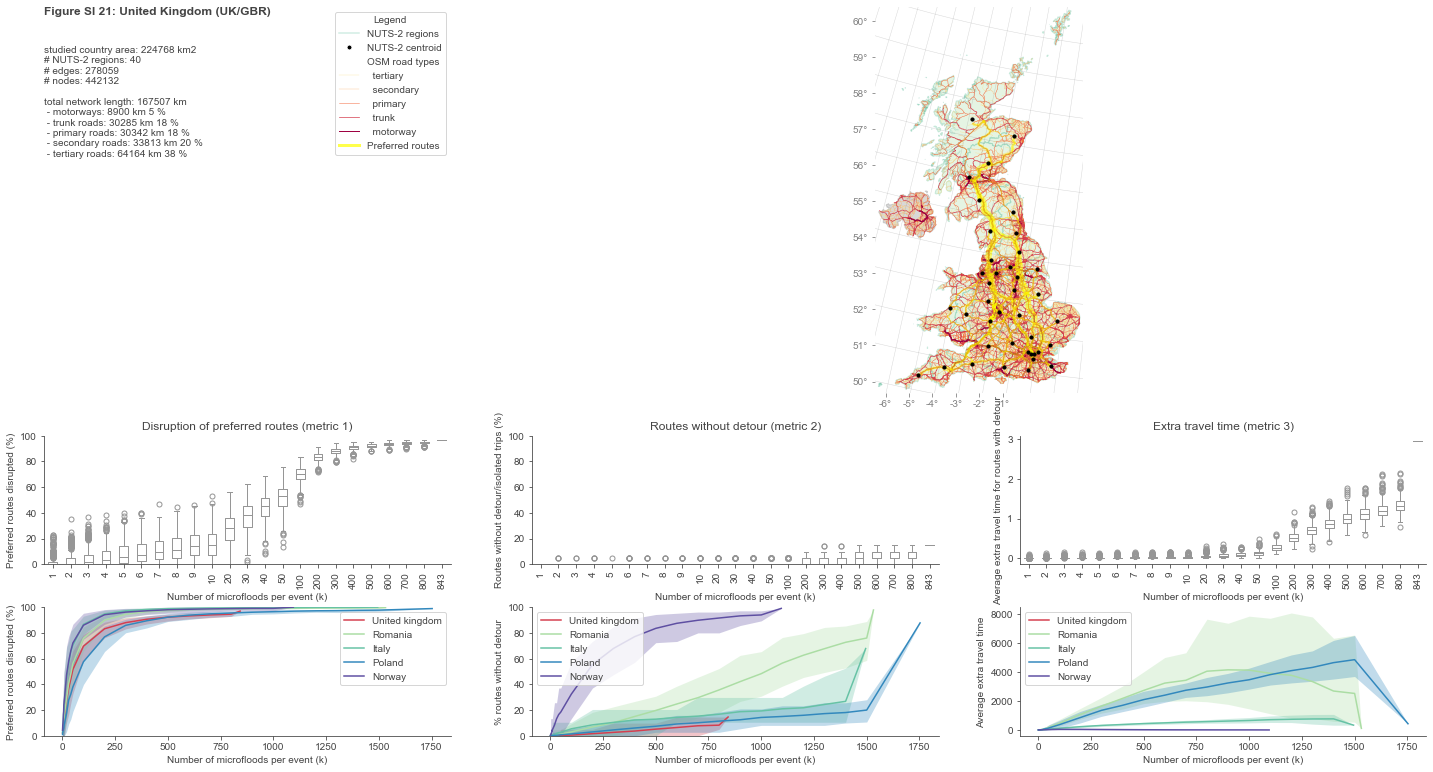

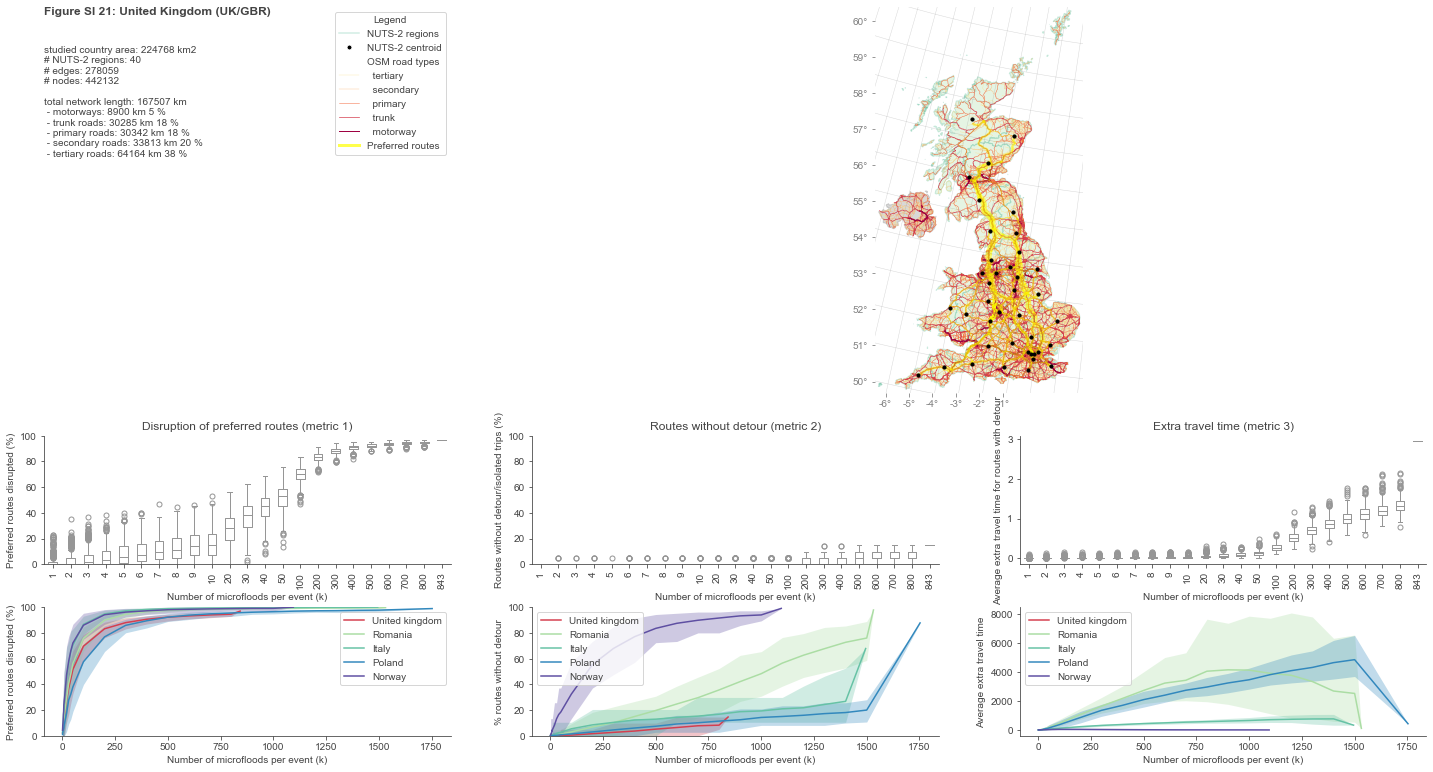

In [36]:
#create_dashboard('UK',save_pdf=True,save_png=True,fb=('q_05','q_95'))

In [37]:
for c in country_order:
    print(c)
    try:
        create_dashboard(c,save_pdf=True,save_png=True)
        plt.close('all')
    except Exception as e:
        print('-'*30)
        print(c,e)
        print('-'*30)

SI
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Slovenia SI 66
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Macedonia MK 28
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Albania AL 66
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Belgium BE 55
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Netherlands NL 66
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for SI finished
dashboard for SI saved
MK
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Slovenia SI 66
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Macedonia MK 28
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Albania AL 66
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Belgium BE 55
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Netherlands NL 66
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for MK finished
dashboard for MK saved
AL
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Slovenia SI 66
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Macedonia MK 28
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Albania AL 66
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Belgium BE 55
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Netherlands NL 66
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for AL finished
dashboard for AL saved
BE
Making NUTS-2 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Slovenia SI 66
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Macedonia MK 28
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Albania AL 66
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Belgium BE 55
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Netherlands NL 66
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for BE finished
dashboard for BE saved
NL
Making NUTS-2 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Slovenia SI 66
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Macedonia MK 28
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Albania AL 66
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Belgium BE 55
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Netherlands NL 66
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for NL finished
dashboard for NL saved
CH
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Switzerland CH 325
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Denmark DK 45
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Estonia EE 10
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Slovakia SK 28
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Croatia HR 190
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for CH finished
dashboard for CH saved
DK
Making NUTS-3 plot
Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Switzerland CH 325
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Denmark DK 45
Optimal routes path do 

C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Switzerland CH 325
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Denmark DK 45
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Estonia EE 10
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Slovakia SK 28
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Croatia HR 190
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for EE finished
dashboard for EE saved
SK
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Switzerland CH 325
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Denmark DK 45
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Estonia EE 10
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Slovakia SK 28
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Croatia HR 190
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for SK finished
dashboard for SK saved
HR
Making NUTS-3 plot
Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Switzerland CH 325
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Denmark DK 45
Optimal routes path do 

C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Latvia LV 15
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Lithuania LT 45
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Ireland IE 28
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Serbia RS 300
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Czechia CZ 91
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for LV finished
dashboard for LV saved
LT
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Latvia LV 15
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Lithuania LT 45
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Ireland IE 28
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Serbia RS 300
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Czechia CZ 91
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for LT finished
dashboard for LT saved
IE
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Latvia LV 15
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Lithuania LT 45
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Ireland IE 28
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Serbia RS 300
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Czechia CZ 91
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for IE finished
dashboard for IE saved
RS
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Latvia LV 15
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Lithuania LT 45
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Ireland IE 28
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Serbia RS 300
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Czechia CZ 91
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for RS finished
dashboard for RS saved
CZ
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Latvia LV 15
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Lithuania LT 45
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Ireland IE 28
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Serbia RS 300
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Czechia CZ 91
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for CZ finished
dashboard for CZ saved
AT
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Austria AT 595
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Portugal PT 253
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Hungary HU 190
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Bulgaria BG 378
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Greece EL 741
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for AT finished
dashboard for AT saved
PT
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Austria AT 595
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Portugal PT 253
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Hungary HU 190
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Bulgaria BG 378
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Greece EL 741
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for PT finished
dashboard for PT saved
HU
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Austria AT 595
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Portugal PT 253
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Hungary HU 190
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Bulgaria BG 378
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Greece EL 741
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for HU finished
dashboard for HU saved
BG
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Austria AT 595
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Portugal PT 253
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Hungary HU 190
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Bulgaria BG 378
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Greece EL 741
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for BG finished
dashboard for BG saved
EL
Making NUTS-3 plot
Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Austria AT 595
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Portugal PT 253
Optimal routes path do not

C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
United Kingdom UK 780
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Romania RO 861
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Italy IT 171
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Poland PL 2628
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Norway NO 105
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for RO finished
dashboard for RO saved
IT
Making NUTS-2 plot
Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
United Kingdom UK 780
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Romania RO 861
Optimal routes pa

C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
United Kingdom UK 780
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Romania RO 861
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Italy IT 171
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Poland PL 2628
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Norway NO 105
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for PL finished
dashboard for PL saved
NO
Making NUTS-3 plot


C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
United Kingdom UK 780
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Romania RO 861
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Italy IT 171
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Poland PL 2628
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Norway NO 105
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for NO finished
dashboard for NO saved
FI
Making NUTS-3 plot
Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Finland FI 153
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Germany DE 703
Optimal routes path do n

C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\europe_flood_road_disruption\lib\site-packages\geopandas\plotting.py:604: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Finland FI 153
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Germany DE 703
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Sweden SE 190
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Spain ES 1081
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
France FR 4371
calc_total_extra_time() finished!
 -------- Process_total_extra_time() finished --------
dashboard for DE finished
dashboard for DE saved
SE
Making NUTS-3 plot
Starting total extra travel time calculation, calc_total_extra_time()
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Finland FI 153
Optimal routes path do not exist for: ['CY', 'IS', 'LI', 'LU', 'ME', 'MT', 'TR']
Germany DE 703
Optimal routes path do not exi